# <center> NLP Using Machine Learning</center>
---

This notebook demonstrates core Natural Language Processing techniques combined with Machine Learning models, including tokenization, feature extraction, and model training — all with hands-on Python code.


## 👋 About Me

Hi, I'm **Vishal Rathour**, a Data Science Enthusiast passionate about NLP and building practical AI solutions.  
📫 Connect with me on [LinkedIn](https://www.linkedin.com/in/vishalrathourr)  
🔗 Explore more on [GitHub](https://github.com/vishalrathourr)


## 🛠️ Tools & Libraries
- Python 🐍  
- NLTK / Scikit-learn  
- Pandas / NumPy  
- Jupyter Notebook 

# Text Preprocessing

## Tokenization
Tokenization is the process of breaking down text into smaller pieces, called tokens, which can be words, characters, or subwords.

### ✅ Why is Tokenization Important?
Computers don't understand raw human language directly. Tokenization converts unstructured text into a structured format that algorithms can process.

### 💡 Types of Tokenization
1. Word Tokenization – Splits text into individual words.
2. Character Tokenization – Splits text into individual characters.
3. Subword Tokenization – Splits words into smaller meaningful parts (used in modern models like BERT or GPT).

### 🧠 Example
Original Text: `ChatGPT is amazing!`

#### 1. Word Tokenization: 

`["ChatGPT", "is", "amazing", "!"]` 

Each word and punctuation is treated as a separate token.

#### 2. Character Tokenization: 

`["C", "h", "a", "t", "G", "P", "T", " ", "i", "s", " ", "a", "m", "a", "z", "i", "n", "g", "!"]` 

Every character is a token, including spaces and punctuation.

#### 3. Subword Tokenization (e.g., using BPE or WordPiece): 

`["Chat", "G", "PT", " is", " amazing", "!"]` 

Words are split into smaller chunks, especially useful for rare or compound words.



In [1]:
from nltk.tokenize import sent_tokenize

text = "ChatGPT is amazing! It can help you write code, explain concepts, and much more. Isn't that great?"

sentences = sent_tokenize(text)

print(sentences)

['ChatGPT is amazing!', 'It can help you write code, explain concepts, and much more.', "Isn't that great?"]


In [2]:
from nltk.tokenize import word_tokenize

text = "ChatGPT is amazing!"
tokens = word_tokenize(text)
print(tokens)

['ChatGPT', 'is', 'amazing', '!']


## Stemming
- Reduces words to their root form by chopping off suffixes.

### 1. Porter Stemmer
✅ Use Case:
- Best for general English text processing tasks like information retrieval, search engines, or basic NLP pipelines.

- Good balance between performance and accuracy.

📌 Characteristics:
- Rule-based and relatively conservative.

- May not always produce real words.


In [3]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = ["running", "flies", "easily", "flying", "played", "happily"]

stems = [stemmer.stem(word) for word in words]
print(stems)

['run', 'fli', 'easili', 'fli', 'play', 'happili']


### 2. Lancaster Stemmer
✅ Use Case:
- Suitable when you value speed and want a very aggressive stemming strategy.

- Good for use cases where over-stemming is acceptable, such as duplicate detection or topic clustering.

📌 Characteristics:
- More aggressive than Porter.

- Often reduces words too much (over-stemming), which may distort meaning.

In [4]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()
words = ["running", "flies", "easily", "flying", "played", "happily"]
[stemmer.stem(w) for w in words]

['run', 'fli', 'easy', 'fly', 'play', 'happy']

### 3. Snowball Stemmer (Porter2)
✅ Use Case:
- A better choice for modern NLP tasks, offering a good balance between accuracy and aggressiveness.

- Recommended for multi-language support, text normalization, and machine learning pipelines.

📌 Characteristics:
- More advanced and consistent than Porter.

- Supports multiple languages ("english", "french", "german", etc.).

In [5]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")
words = ["running", "flies", "easily", "flying", "played", "happily"]
[stemmer.stem(w) for w in words]


['run', 'fli', 'easili', 'fli', 'play', 'happili']

### 4. RegexpStemmer
✅ Use Case:
- Custom stemming based on your own rules using regular expressions.

- Best for domain-specific tasks where default stemmers don’t work well.

- Useful when you want to strip predictable suffixes like “-ing”, “-ed”, “-s”, etc.

📌 Characteristics:
- Allows manual control over stemming behavior.

- Not intelligent—only removes matching patterns based on your rule.

In [6]:
from nltk.stem import RegexpStemmer

# Remove common suffixes manually
stemmer = RegexpStemmer('ing$|ed$|s$')

words = ["running", "flies", "played", "talks", "jumps"]
stems = [stemmer.stem(w) for w in words]
print(stems)

['runn', 'flie', 'play', 'talk', 'jump']


In [7]:
stemmer = RegexpStemmer('ing$')

words = ["running", "playing", "reading"]
stems = [stemmer.stem(w) for w in words]
print(stems)

['runn', 'play', 'read']


## Lemmatization

| Feature        | Stemming                    | Lemmatization                           |
| -------------- | --------------------------- | --------------------------------------- |
| Output         | Root form (can be non-word) | Dictionary word                         |
| Context aware? | ❌ No                        | ✅ Yes                                 |
| Example        | `running → run` (both)      | `better → good` (only in lemmatization) |
| POS used?      | ❌ Usually not               | ✅ Required for accuracy               |


In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
words = ["running", "flies", "easily", "flying", "played", "happily"]
lemmas = [lemmatizer.lemmatize(word) for word in words]
print(lemmas)

['running', 'fly', 'easily', 'flying', 'played', 'happily']


In [9]:
lemmas = [lemmatizer.lemmatize(word, pos='v') for word in words]
print(lemmas)

['run', 'fly', 'easily', 'fly', 'play', 'happily']


In [10]:
words = [
    ("running", "v"),     # verb
    ("flies", "n"),       # noun
    ("better", "a"),      # adjective
    ("played", "v"),
    ("children", "n"),    # plural noun
    ("am", "v"),          # verb (be form)
]

for word, pos in words:
    print(f"{word} ({pos}) → {lemmatizer.lemmatize(word, pos)}")

running (v) → run
flies (n) → fly
better (a) → good
played (v) → play
children (n) → child
am (v) → be


## Parts of Speech tagging

POS tagging is the process of assigning a grammatical category (noun, verb, adjective, etc.) to each word in a sentence.

📌 Example Categories:
- NN – Noun (e.g., dog, book)
- VB – Verb (base form, e.g., run, play)
- JJ – Adjective (e.g., happy, blue)
- RB – Adverb (e.g., quickly, very)
- PRP – Personal pronoun (e.g., he, they)
- IN – Preposition (e.g., in, on)



| Use Case                     | Benefit of POS Tagging                        |
| ---------------------------- | --------------------------------------------- |
| **Lemmatization**            | Uses POS to return correct base form          |
| **Named Entity Recognition** | Helps identify proper nouns and entities      |
| **Syntactic Parsing**        | Enables grammar-based sentence analysis       |
| **Text classification**      | Feature for ML models (e.g., noun frequency)  |
| **Question answering**       | Understands subject-verb-object relationships |


In [11]:
import nltk
from nltk import pos_tag, word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
paragraph = """
Natural Language Processing is a fascinating field of study in computer science.
It deals with the interaction between computers and human language.
Researchers are developing algorithms that can understand, interpret, and generate text just like humans.
Applications include chatbots, translation tools, sentiment analysis, and more.
"""

In [13]:
tokens = word_tokenize(paragraph)
tagged = pos_tag(tokens)

In [17]:
tagged[:10]

[('Natural', 'JJ'),
 ('Language', 'NNP'),
 ('Processing', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('fascinating', 'JJ'),
 ('field', 'NN'),
 ('of', 'IN'),
 ('study', 'NN'),
 ('in', 'IN')]

In [18]:
import pandas as pd
df = pd.DataFrame(tagged, columns=["Token", "POS Tag"])
print(df.head(15))

          Token POS Tag
0       Natural      JJ
1      Language     NNP
2    Processing     NNP
3            is     VBZ
4             a      DT
5   fascinating      JJ
6         field      NN
7            of      IN
8         study      NN
9            in      IN
10     computer      NN
11      science      NN
12            .       .
13           It     PRP
14        deals     VBZ


## Named Entity Recognition

Named Entity Recognition (NER) is the process of identifying and classifying named entities in text into predefined categories, such as:


| Category         | Examples                  |
| ---------------- | ------------------------- |
| **PERSON**       | Elon Musk, Barack Obama   |
| **ORGANIZATION** | Google, United Nations    |
| **LOCATION**     | Paris, Mount Everest      |
| **DATE**         | July 4, 2025, Monday      |
| **TIME**         | 5 p.m., noon              |
| **MONEY**        | \$100, 1 million euros    |
| **PERCENT**      | 90%, 25 percent           |
| **GPE**          | Countries, cities, states |


In [19]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [20]:
text = """
Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in Cupertino, California.
In 2023, the company reported revenues of over $394 billion.
President Joe Biden visited the Apple headquarters last summer.
"""

In [21]:
import nltk
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [22]:
words = word_tokenize(text)
tag_elements = pos_tag(words)
named_entities = ne_chunk(tag_elements)

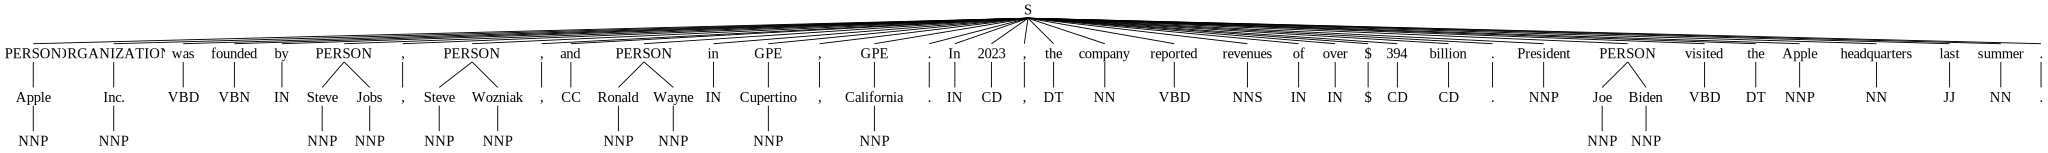

In [23]:
named_entities

---

# Text to Vectors 
### 🧠 Why Convert Words to Vectors?
Machine learning models can only understand numbers, not raw text. To train models for tasks like classification, translation, sentiment analysis, etc., we need to convert words or documents into fixed-size vectors.

## 1. One Hot Encoding
### 🧠 What is One-Hot Encoding?
One-Hot Encoding represents each word in a vocabulary as a binary vector:

- Each word is represented by a vector the same length as the vocabulary.
- The position corresponding to that word is 1, and all other positions are 0.

#### 🔍 Example:
Assume we have a vocabulary of 5 words: \
["I", "love", "NLP", "is", "fun"]

Then, one-hot encodings would be:
| Word | One-Hot Vector   |
| ---- | ---------------- |
| I    | \[1, 0, 0, 0, 0] |
| love | \[0, 1, 0, 0, 0] |
| NLP  | \[0, 0, 1, 0, 0] |
| is   | \[0, 0, 0, 1, 0] |
| fun  | \[0, 0, 0, 0, 1] |



In [24]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

words = np.array(["I", "love", "NLP", "is", "fun"]).reshape(-1, 1)

encoder = OneHotEncoder()
onehot = encoder.fit_transform(words)

print(encoder.categories_)

[array(['I', 'NLP', 'fun', 'is', 'love'], dtype='<U4')]


In [25]:
print(onehot)

  (0, 0)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 3)	1.0
  (4, 2)	1.0


#### ⚠️ Limitations of One-Hot Encoding
| Limitation              | Description                                      |
| ----------------------- | ------------------------------------------------ |
| **High dimensionality** | If you have 10,000 words → 10,000-length vectors |
| **No semantics**        | All vectors are equally distant (no meaning)     |
| **Memory inefficient**  | Mostly zeros → sparse and wasteful               |

#### ✅ When to Use One-Hot Encoding

| Use Case                    | Suitability                                |
| --------------------------- | ------------------------------------------ |
| Simple rule-based systems   | ✅ Good fit                                 |
| Small, fixed vocabularies   | ✅ Efficient                                |
| As part of embedding layers | ✅ Used before training Word2Vec/BERT, etc. |
| Large NLP models            | ❌ Not scalable alone                       |



## 2. Bag of Words (BoW)
#### 📌 Description:
Counts how many times each word appears in a document.

Ignores grammar and word order.

#### ✅ Use Case:
Simple text classification tasks (e.g., spam detection, topic classification).

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

texts = ["I love NLP", "NLP is fun and useful"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())

['and' 'fun' 'is' 'love' 'nlp' 'useful']


In [27]:
print(X.toarray())

[[0 0 0 1 1 0]
 [1 1 1 0 1 1]]


### 🧠 What is an N-gram?
An n-gram is a contiguous sequence of n items (usually words) from a given text or speech.

- A unigram is a single word (n = 1)
- A bigram is a pair of consecutive words (n = 2)
- A trigram is a sequence of three words (n = 3)

And so on...

N-grams help preserve context and word order compared to Bag of Words.

**Example: "I love natural language processing"**
| N           | N-grams                                                            |
| ----------- | ------------------------------------------------------------------ |
| 1 (unigram) | I, love, natural, language, processing                             |
| 2 (bigram)  | I love, love natural, natural language, language processing        |
| 3 (trigram) | I love natural, love natural language, natural language processing |


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love natural language processing"]
vectorizer = CountVectorizer(ngram_range=(1, 2))  # unigrams and bigrams
X = vectorizer.fit_transform(text)

print("N-gram Vocabulary:", vectorizer.get_feature_names_out())
print("N-gram Matrix:\n", X.toarray())

N-gram Vocabulary: ['language' 'language processing' 'love' 'love natural' 'natural'
 'natural language' 'processing']
N-gram Matrix:
 [[1 1 1 1 1 1 1]]


#### ✅ Why Use N-grams?
| Use Case            | Benefit                                   |
| ------------------- | ----------------------------------------- |
| Language modeling   | Predict the next word based on previous n |
| Text classification | Capture phrases (e.g., "not good")        |
| Sentiment analysis  | Understand multi-word expressions         |
| Spelling correction | Match common n-gram sequences             |


## 3. TF-IDF

TF-IDF stands for:

- **TF** – Term Frequency: how often a word appears in a document
- **IDF** – Inverse Document Frequency: how unique or rare a word is across all documents

Together, TF-IDF measures how important a word is to a specific document in a collection. \

**Term Frequency (TF)**  
$$
\text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
$$

**Inverse Document Frequency (IDF)**  
$$
\text{IDF}(t) = \log\left(\frac{N}{1 + df(t)}\right)
$$

Where:


- N: total number of documents

- df(t): number of documents containing term t

**TF-IDF**  
$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$


Suppose we have 3 documents:

Doc1: "I love NLP" \
Doc2: "NLP is fun" \
Doc3: "I love fun" \
Let’s calculate TF-IDF for the term "love": \


- Appears in Doc1 and Doc3
- Total documents = 3 → 𝑁=3
- Document Frequency 𝑑𝑓("𝑙𝑜𝑣𝑒")=2

So,

$ IDF('𝑙𝑜𝑣𝑒')=\log\left(\frac{3}{1 + 2}\right)=0 $ \
\
**Meaning:** "love" is too common → has low importance.


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = ["I love NLP", "NLP is fun", "I love fun"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['fun' 'is' 'love' 'nlp']
[[0.         0.         0.70710678 0.70710678]
 [0.51785612 0.68091856 0.         0.51785612]
 [0.70710678 0.         0.70710678 0.        ]]


#### ✅ Why Use TF-IDF?
| Feature                         | Benefit                                                        |
| ------------------------------- | -------------------------------------------------------------- |
| Weights important words         | Down-weights common but uninformative words (like “the”, “is”) |
| Improves text classification    | Better than raw counts (BoW)                                   |
| Works well for document ranking | Used in search engines like Google                             |

#### ❌ Limitations
| Limitation           | Description                                    |
| -------------------- | ---------------------------------------------- |
| No semantic meaning  | “love” and “like” are unrelated numerically    |
| Still sparse vectors | May be inefficient for very large vocabularies |
| Ignores word order   | Can’t detect phrases or grammar                |

#### 📝 Summary
| Term       | Meaning                               |
| ---------- | ------------------------------------- |
| **TF**     | How often a word occurs in a document |
| **IDF**    | How rare the word is across all docs  |
| **TF-IDF** | Importance of a word in a document    |



## Word Embeddings
Word embeddings are dense vector representations of words in a continuous vector space, where similar words are mapped to similar vectors.

`vector("king") - vector("man") + vector("woman") ≈ vector("queen")`


Word embedding is a way to turn words into numbers, so a computer can understand them — but not just any numbers.

It represents each word as a list of numbers (a vector) where:
- Similar words (like "king" and "queen") get similar numbers
- Different words (like "apple" and "car") get very different numbers

So the computer can figure out which words are related and how closely.
| Word  | Embedding (vector example) |
| ----- | -------------------------- |
| king  | \[0.2, 0.5, -0.3]          |
| queen | \[0.2, 0.6, -0.3]          |
| apple | \[-0.7, 0.1, 0.4]          |

"king" and "queen" have similar vectors → so the computer knows they are related.

#### 🤔 Why Do We Need Word Embeddings?
| Problem with Traditional Approaches | Word Embeddings Solve                       |
| ----------------------------------- | ------------------------------------------- |
| One-hot vectors are huge & sparse   | Embeddings are dense & compact              |
| No meaning or similarity captured   | Embeddings group similar meanings together  |
| Cannot generalize across contexts   | Embeddings help capture word usage patterns |

#### 💡 Key Idea
Each word is represented as a vector of real numbers (e.g., 100–300 dimensions), trained so that words used in similar contexts have similar vectors.

#### 🛠 Common Word Embedding Models
| Model          | Description                                                          |
| -------------- | -------------------------------------------------------------------- |
| **Word2Vec**   | Predicts a word from its context (or vice versa)                     |
| **GloVe**      | Builds word vectors using matrix factorization of word co-occurrence |
| **FastText**   | Includes subword information (good for misspellings and rare words)  |
| **ELMo, BERT** | Contextual embeddings (meaning changes based on sentence context)    |



### 🧠 What is Word2Vec?
Word2Vec is a method to convert words into vectors so that:

- Similar words have similar vectors
- It captures meaning and context of words

It was introduced by Google in 2013 and is trained using a neural network.

#### 🔁 How It Works 
Word2Vec trains on a text corpus and learns word relationships.

Two training methods:

##### 1. CBOW (Continuous Bag of Words)
**Concept:**
CBOW predicts the target word using its context words (surrounding words).

- Input: Context (surrounding words)
- Output: Target word (the word in the middle)

**Example:**
Given the sentence:
"The cat sits on the mat"

For a context window of size 2:
Context: ["The", "sits"] → Target: "cat"

CBOW tries to learn the representation such that, given surrounding words, it can predict the central word.

##### 2. Skip-Gram
**Concept:**
Skip-Gram does the reverse. It predicts context words from the target word.
- Input: Target word
- Output: Context (surrounding words)

**Example:**
Given the same sentence:
"The cat sits on the mat"

Target: "cat" → Context: ["The", "sits"]

Skip-Gram tries to learn word representations such that, given a word, it can predict its context. 

##### CBOW vs Skip-Gram
| Feature               | CBOW             | Skip-Gram             |
| --------------------- | ---------------- | --------------------- |
| Direction             | Context → Target | Target → Context      |
| Performance           | Faster to train  | Slower to train       |
| Accuracy (Rare Words) | Lower            | Better for rare words |

**Conclusion**
- CBOW is faster and works better for frequent words.
- Skip-Gram is better for rare words and provides finer representations.



In [30]:
# !pip install gensim

In [31]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('punkt')

# Sample corpus
text = "The cat sits on the mat. The dog plays with the cat."

# Tokenize
tokens = word_tokenize(text.lower())
print("Tokens:", tokens)

# Create a list of sentences for Word2Vec (list of list of tokens)
data = [tokens]

# CBOW Model (sg=0)
cbow_model = Word2Vec(sentences=data, vector_size=50, window=2, min_count=1, sg=0)

# Skip-Gram Model (sg=1)
skipgram_model = Word2Vec(sentences=data, vector_size=50, window=2, min_count=1, sg=1)

# Check vector of a word
print("\nCBOW Vector for 'cat':\n", cbow_model.wv['cat'])
print("\nSkip-Gram Vector for 'cat':\n", skipgram_model.wv['cat'])

# Find similar words
print("\nCBOW similar to 'cat':", cbow_model.wv.most_similar('cat'))
print("Skip-Gram similar to 'cat':", skipgram_model.wv.most_similar('cat'))

Tokens: ['the', 'cat', 'sits', 'on', 'the', 'mat', '.', 'the', 'dog', 'plays', 'with', 'the', 'cat', '.']

CBOW Vector for 'cat':
 [-0.01723935  0.00733214  0.0103783   0.01148358  0.01493548 -0.01233377
  0.00221044  0.01209513 -0.00568189 -0.01234571 -0.00082144 -0.01673858
 -0.01119803  0.01420926  0.00670669  0.01445003  0.0136016   0.01506361
 -0.00758013 -0.00112471  0.00469524 -0.00903911  0.01677665 -0.01971816
  0.01353099  0.00582779 -0.00986385  0.00879751 -0.00348056  0.01342362
  0.01993087 -0.00872648 -0.00120027 -0.01139181  0.00769979  0.00557291
  0.01378207  0.0122029   0.0190773   0.01854664  0.01579493 -0.01397864
 -0.01831192 -0.00071005 -0.00619883  0.01578961  0.01187746 -0.00309191
  0.00302099  0.00357986]

Skip-Gram Vector for 'cat':
 [-0.01723935  0.00733214  0.0103783   0.01148358  0.01493548 -0.01233377
  0.00221044  0.01209513 -0.00568189 -0.01234571 -0.00082144 -0.01673858
 -0.01119803  0.01420926  0.00670669  0.01445003  0.0136016   0.01506361
 -0.007580

# <center> Practical Implementation</center>
## <center> Spam vs Ham Classification</center>

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bagavathypriya/spam-ham-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\visha\.cache\kagglehub\datasets\bagavathypriya\spam-ham-dataset\versions\1


In [34]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\visha\.cache\kagglehub\datasets\bagavathypriya\spam-ham-dataset\versions\1\spamhamdata.csv", sep="\t", encoding="utf-8", names=["label", "text"])    

In [36]:
df.head() 

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 1. Using BoW

In [37]:
# Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
ps = PorterStemmer()

In [39]:
corpus = []

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [40]:
corpus[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [41]:
# Create the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1, 2))

In [42]:
# independent variable
X = cv.fit_transform(corpus).toarray()

In [43]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%0.3f" % x))
X[:5, :10]  # Display first 5 rows and first 10 columns 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [44]:
X.shape

(5572, 5000)

In [45]:
# cv.vocabulary_

In [46]:
# Output feature 
y = pd.get_dummies(df['label'])

In [48]:
y = y.iloc[:, 1].values # 0 for ham, 1 for spam

In [49]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Create the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)    
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

Confusion Matrix:
 [[962   4]
 [  8 141]]
Accuracy: 0.989237668161435
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



### 2. Using TF-IDF

In [51]:
# Creating the tfidf model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(corpus).toarray()
X[:5, :10]  # Display first 5 rows and first 10 columns
# X.shape

array([[0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]])

In [52]:
# tfidf.vocabulary_ 

In [53]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_classifier = MultinomialNB()
tfidf_classifier.fit(X_train, y_train)
y_pred = tfidf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

Confusion Matrix:
 [[966   0]
 [ 24 125]]
Accuracy: 0.97847533632287
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

